# Notebook to demo Embeddings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ollama
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim, dot_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

### Embed using Ollama.

In [2]:
response = ollama.embed(
    model="nomic-embed-text",
    input="Why is the sky blue?",
)

In [3]:
response.embeddings[0][:10]

[0.009723208,
 0.044502635,
 -0.14063999,
 0.0013246505,
 0.032125983,
 0.10729883,
 -0.008443718,
 0.010103003,
 0.0005168449,
 -0.03553843]

### Embed using SentenceTransformer

In [4]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [5]:
# Define a set of sentences
sentences = [
    "The cat sits on the mat.",
    "A dog plays in the garden.",
    "Machine learning is fascinating.",
    "AI is transforming the world.",
    "The sky is blue due to Rayleigh scattering.",
]

# Generate embeddings
embeddings = model.encode(
    sentences,
    normalize_embeddings=True,
)

print(f"Embedding shape: {embeddings.shape}")  # Shoul

Embedding shape: (5, 384)


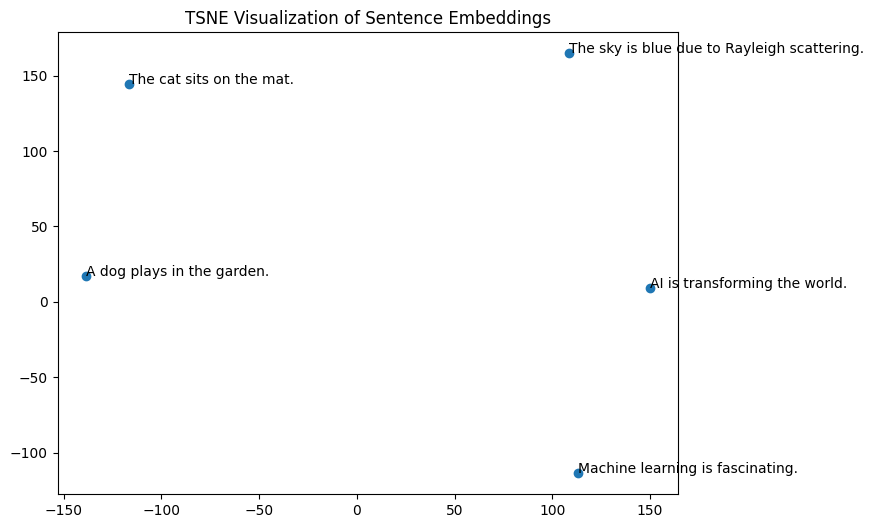

In [6]:
def plot_embeddings(
    embeddings,
    labels,
    method="tsne",
    perplexity=3,
) -> None:
    # Check if using t-SNE, otherwise use PCA
    reducer = (
        TSNE(n_components=2, perplexity=perplexity)
        if method == "tsne"
        else PCA(n_components=2)
    )

    reduced = reducer.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1])

    for i, label in enumerate(labels):
        plt.annotate(label, (reduced[i, 0], reduced[i, 1]), fontsize=10)

    plt.title(f"{method.upper()} Visualization of Sentence Embeddings")
    plt.show()


# Call the function with perplexity set correctly
plot_embeddings(embeddings, sentences, method="tsne", perplexity=3)

In [7]:
# User query
# query = "Why is the sky blue?"
query = "Where is the dog playing?"
query_embedding = model.encode(
    query,
    normalize_embeddings=True,
)

# Compute cosine similarity
similarities = cosine_similarity([query_embedding], embeddings)

# Get best match index
best_match_index = np.argmax(similarities)
print(f"Most similar sentence: {sentences[best_match_index]}")

Most similar sentence: A dog plays in the garden.


In [8]:
similarities = dot_score(query_embedding, embeddings)[0]
best_match_index = np.argmax(similarities)
print(f"Most similar sentence: {sentences[best_match_index]}")

Most similar sentence: A dog plays in the garden.
